In [32]:
import numpy as np
import math as m
import networkx as nx
import matplotlib.pyplot as plt
from time import time
import seaborn as sns

In [2]:
def get_stimulus(A, beta, reward):
    arg = beta*(reward - A)
    return m.tanh(arg)

In [3]:
def update_p(aspiration_level, beta, reward, prev_action, p):
    s = get_stimulus(aspiration_level, beta, reward)
    if prev_action == 0: #previous action = cooperation
        if s >= 0:
            return p + (1-p)*s
        else:
            return p + p*s
    else: #previous action = defect
        if s >= 0:
            return p - p*s
        else:
            return p - (1-p)*s

In [4]:
def misimplement_prob_update(eps, prob):
    return prob*(1-eps) + (1-prob)*eps

In [5]:
def get_payoff_matrix(b,c):
    return np.array([[b-c, -c],
                     [b, 0]])

In [6]:
def get_payoffs(p1, p2):
    return payoff_mat[p1][p2]

In [7]:
def create_ring_graph(N, k):
    return nx.watts_strogatz_graph(N, k, 0)


#pos = nx.circular_layout(G_small_ring)
#plt.figure(3,figsize=(20,20)) 
#nx.draw_networkx(G_small_ring, pos=pos, with_labels=False)


In [8]:
def simulate_game(G, payoff_mat, k, rounds, A, beta, eps):
    nodes = len(list(G.nodes))
    probas = np.array([0.8 for _ in range(nodes)])
    counts = np.zeros(rounds)
    for r in range(rounds):
        payoffs = np.zeros(nodes)
        actions = np.random.binomial(1, p = (1 - probas))
        #print(actions)
        for node in list(G.nodes):
            for neighbour in list(G.neighbors(node)):
                payoffs[node] += get_payoffs(actions[node], actions[neighbour])
            payoffs[node]/k
        for node in list(G.nodes):
            probas[node] = misimplement_prob_update(eps, update_p(A, beta, payoffs[node], actions[node], probas[node]))
        counts[r] = nodes - np.count_nonzero(actions)
    return counts/nodes

In [9]:
N = 100
k = 2
G = create_ring_graph(N, k)
A = 1
beta = 0.2
eps = 0.05
payoff_mat = get_payoff_matrix(6, 1)

In [ ]:
coops_lvl = []

#for i in range(1000):
#    coops_lvl.append(simulate_game(G, payoff_mat, k, 25, A, beta, eps))
startTime = time()
A_values = np.linspace(-1, 5, num = 100)
eps_values = np.linspace(0, 0.5, num = 100)

heatmap = np.zeros((100,100))

for a_i in range(len(A_values)):
    for eps_i in range(len(eps_values)):
        heatmap[eps_i][a_i] = simulate_game(G, payoff_mat, k, 25, A_values[a_i], beta, eps_values[eps_i])[-1]

endTime = time()
print("\nSimulating took {} seconds".format(round(endTime - startTime)))
np.save(file = "test.npy", arr = heatmap)
        

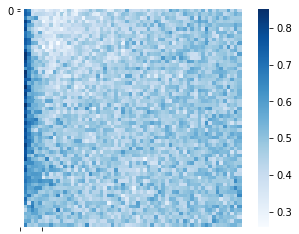

In [30]:
sns.heatmap(heatmap.transpose(), square = True, vmin = np.amin(heatmap), vmax = np.amax(heatmap), annot = False, fmt = ".4f", cmap = "Blues")
plt.xticks([-1,5])
plt.yticks([0,0.5])
plt.show()

In [23]:
"""avg_coops = np.array([0. for _ in range(50)])
for i in range(50):
    for trial in coops_lvl:
        avg_coops[i] += trial[i]
avg_coops = avg_coops/100"""

'avg_coops = np.array([0. for _ in range(50)])\nfor i in range(50):\n    for trial in coops_lvl:\n        avg_coops[i] += trial[i]\navg_coops = avg_coops/100'

In [111]:
def plot_coops(coops_lvl, r):
    x = np.arange(r)
    plt.plot(x, coops_lvl)
    plt.show()

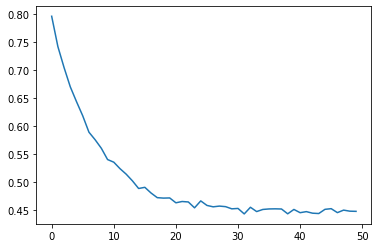

In [112]:
plot_coops(avg_coops, 50)

In [113]:
lbls = np.random.choice(100, replace=False, size=100)
mapping = {i : lbls[i] for i in range(100)}
H = nx.relabel_nodes(G, mapping)